# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, f1_score
import tensorflow as tf
from tensorflow import keras
import nltk
import spacy
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = '/content/drive/My Drive/Dataset Kesejahteraan Pekerja Indonesia/'

# file rataRataUpah.csv
file_path_rata_upah = folder_path + 'rataRataUpah.csv'
df_rata_upah = pd.read_csv(file_path_rata_upah)

# file pengeluaran.csv
file_path_pengeluaran = folder_path + 'pengeluaran.csv'
df_pengeluaran = pd.read_csv(file_path_pengeluaran)

# file garisKemiskinan.csv
file_path_garis_kemiskinan = folder_path + 'garisKemiskinan.csv'
df_garis_kemiskinan = pd.read_csv(file_path_garis_kemiskinan)

# file minUpah.csv
file_path_min_upah = folder_path + 'minUpah.csv'
df_min_upah = pd.read_csv(file_path_min_upah)

print("DataFrame rataRataUpah:")
print(df_rata_upah.head())

print("\nDataFrame pengeluaran:")
print(df_pengeluaran.head())

print("\nDataFrame garisKemiskinan:")
print(df_garis_kemiskinan.head())

print("\nDataFrame minUpah:")
print(df_min_upah.head())

DataFrame rataRataUpah:
  provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065

DataFrame pengeluaran:
  provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0

DataFrame garisKemiskinan:
  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0

DataFrame minUpah:
  provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   2004  550000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
def struktur_data(df, nama_df):
  print("\nStruktur Data")
  print(f"\nStruktur Data {nama_df}:")
  print(f"{'Jumlah Baris':<15}: {df.shape[0]}")
  print(f"{'Jumlah Kolom':<15}: {df.shape[1]}")
  print(f"{'Tipe Data':<15}: {', '.join([f'{col} ({dtype})' for col, dtype in df.dtypes.items()])}")

struktur_data(df_rata_upah, "rataRataUpah")
struktur_data(df_pengeluaran, "pengeluaran")
struktur_data(df_garis_kemiskinan, "garisKemiskinan")
struktur_data(df_min_upah, "minUpah")


Struktur Data

Struktur Data rataRataUpah:
Jumlah Baris   : 280
Jumlah Kolom   : 3
Tipe Data      : provinsi (object), tahun (int64), upah (int64)

Struktur Data

Struktur Data pengeluaran:
Jumlah Baris   : 4620
Jumlah Kolom   : 5
Tipe Data      : provinsi (object), daerah (object), jenis (object), tahun (int64), peng (float64)

Struktur Data

Struktur Data garisKemiskinan:
Jumlah Baris   : 5460
Jumlah Kolom   : 6
Tipe Data      : provinsi (object), jenis (object), daerah (object), tahun (int64), periode (object), gk (float64)

Struktur Data

Struktur Data minUpah:
Jumlah Baris   : 735
Jumlah Kolom   : 3
Tipe Data      : provinsi (object), tahun (int64), ump (float64)


**Insight:**

Dataset ini berisi informasi tentang **kondisi ekonomi** di berbagai provinsi di Indonesia yang dibagi menjadi empat bagian. **RataRataUpah **mencatat rata-rata gaji di setiap provinsi berdasarkan tahun. **Pengeluaran** berisi data tentang seberapa besar pengeluaran masyarakat di berbagai daerah (kota atau desa) dan **jenis pengeluarannya**. **GarisKemiskinan** mencatat batas minimal pendapatan yang dibutuhkan agar tidak dianggap miskin di setiap provinsi, lengkap dengan **informasi wilayah dan periode waktu** tertentu. **MinUpah** mencatat upah minimum yang berlaku di setiap provinsi berdasarkan tahun. Data ini bisa digunakan untuk memahami hubungan antara pendapatan, pengeluaran, batas kemiskinan, dan upah minimum di seluruh Indonesia.

In [6]:
def data_hilang(df, nama_df):
    print("\nData Hilang")
    print(f"\nData Hilang {nama_df}:")
    print(df.isnull().sum().to_frame().T)

data_hilang(df_rata_upah, "rataRataUpah")
data_hilang(df_pengeluaran, "pengeluaran")
data_hilang(df_garis_kemiskinan, "garisKemiskinan")
data_hilang(df_min_upah, "minUpah")


Data Hilang

Data Hilang rataRataUpah:
   provinsi  tahun  upah
0         0      0     0

Data Hilang

Data Hilang pengeluaran:
   provinsi  daerah  jenis  tahun  peng
0         0       0      0      0   108

Data Hilang

Data Hilang garisKemiskinan:
   provinsi  jenis  daerah  tahun  periode   gk
0         0      0       0      0        0  199

Data Hilang

Data Hilang minUpah:
   provinsi  tahun  ump
0         0      0   24


**Insight:**

Dari hasil pemeriksaan data yang hilang di setiap dataset, ditemukan bahwa dataset **rataRataUpah** tidak memiliki data yang hilang di kolom provinsi, tahun, dan upah. Pada dataset pengeluaran, terdapat 108 data yang hilang di kolom **peng** (pengeluaran), sedangkan **kolom lainnya lengkap**. Di dataset **garisKemiskinan**, terdapat 199 data yang hilang di kolom **gk** (garis kemiskinan), sementara kolom lainnya tidak mengalami kekosongan. Sementara itu, di dataset **minUpah**, terdapat 24 data yang hilang di kolom **ump** (upah minimum provinsi), dan kolom lainnya lengkap. Kekosongan ini terutama terjadi di kolom yang berisi nilai numerik dan perlu ditangani sebelum melanjutkan analisis lebih lanjut.


Distribusi dan Kolerasi

Distribusi dan Korelasi rataRataUpah:
       count          mean          std
tahun  280.0   2018.500000     2.295390
upah   280.0  16621.010714  4371.803056


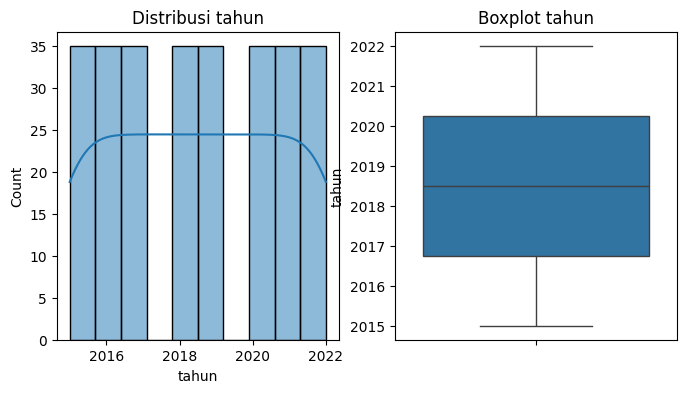

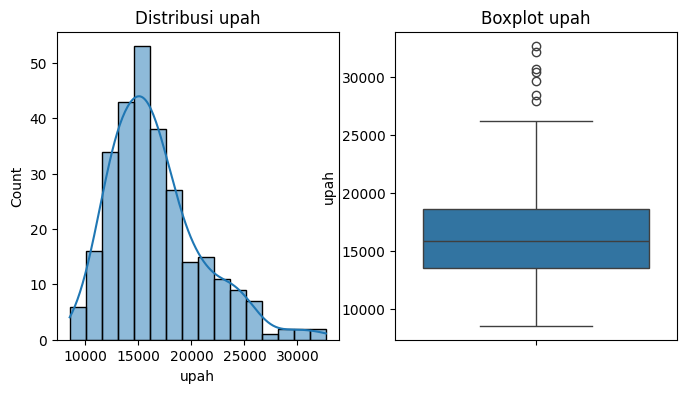

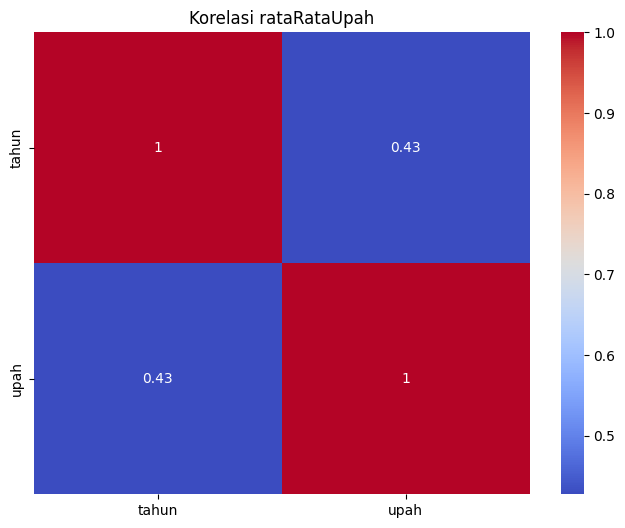


Distribusi dan Korelasi pengeluaran:
        count           mean            std
tahun  4620.0    2015.045455       4.416124
peng   4512.0  601201.168661  352405.192684


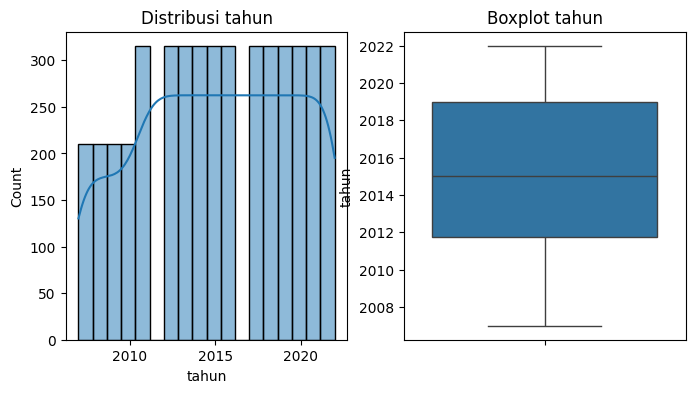

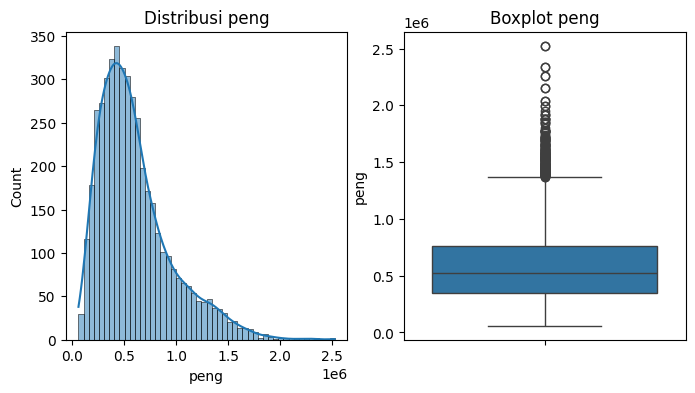

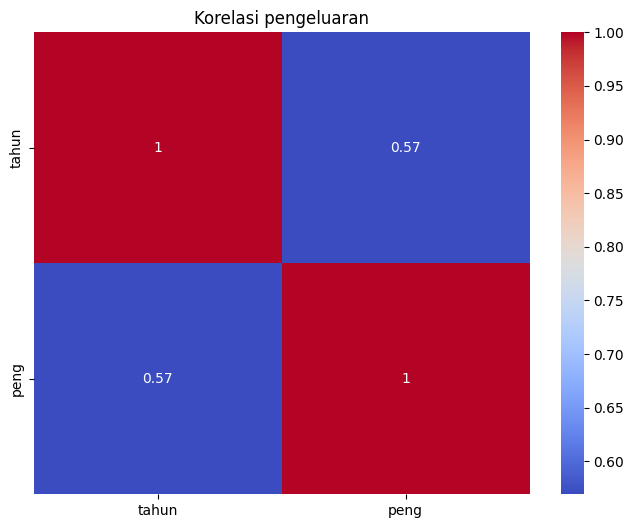


Distribusi dan Korelasi garisKemiskinan:
        count           mean            std
tahun  5460.0    2018.115385       2.577159
gk     5261.0  303904.185516  158176.024903


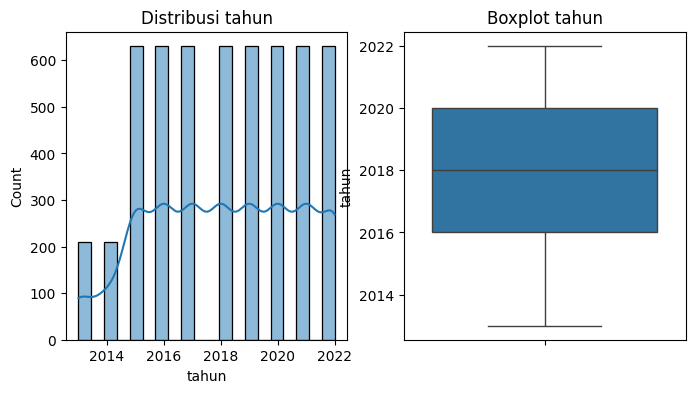

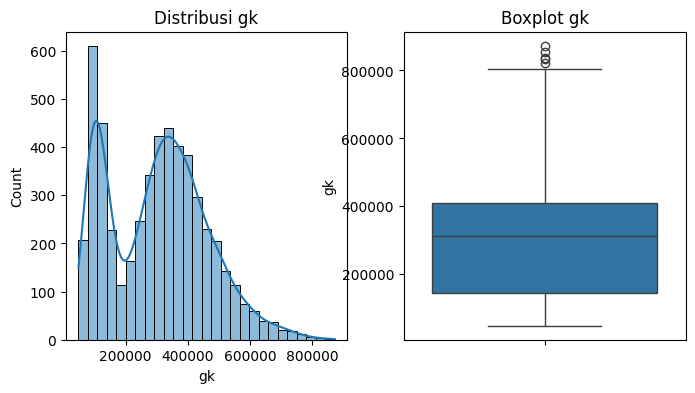

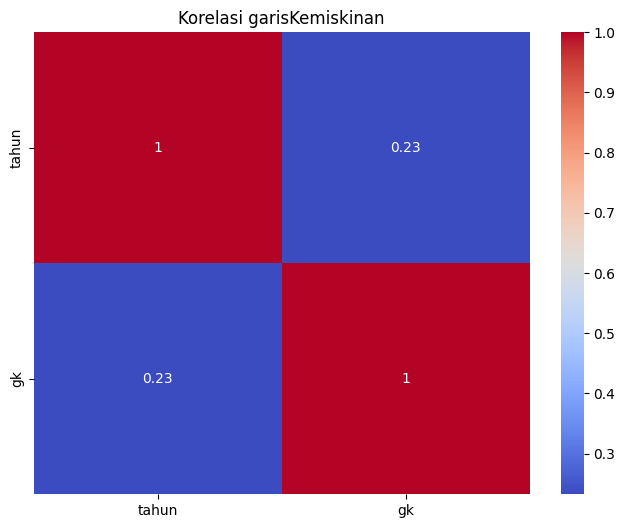


Distribusi dan Korelasi minUpah:
       count          mean            std
tahun  735.0  2.012000e+03       6.059424
ump    711.0  1.402290e+06  876262.234824


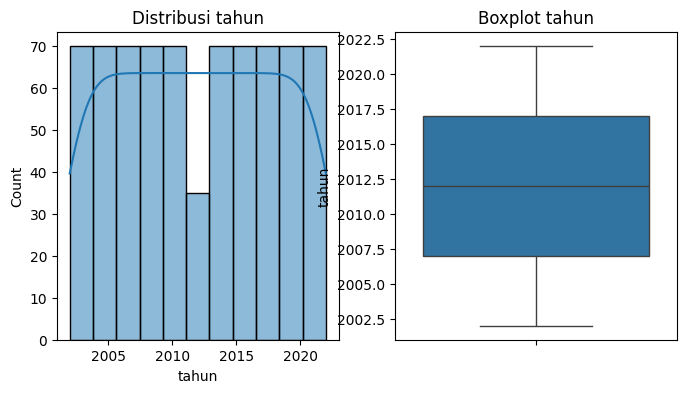

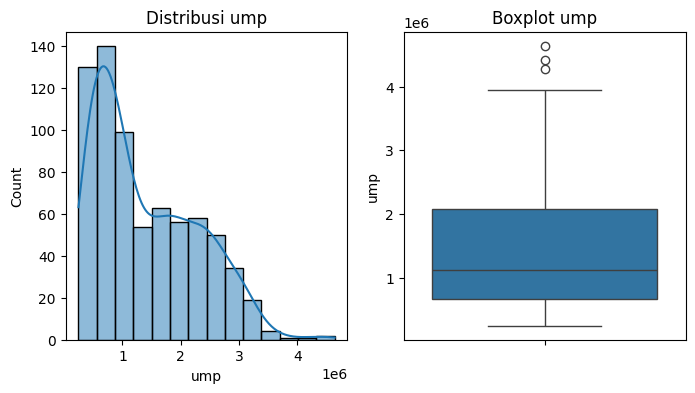

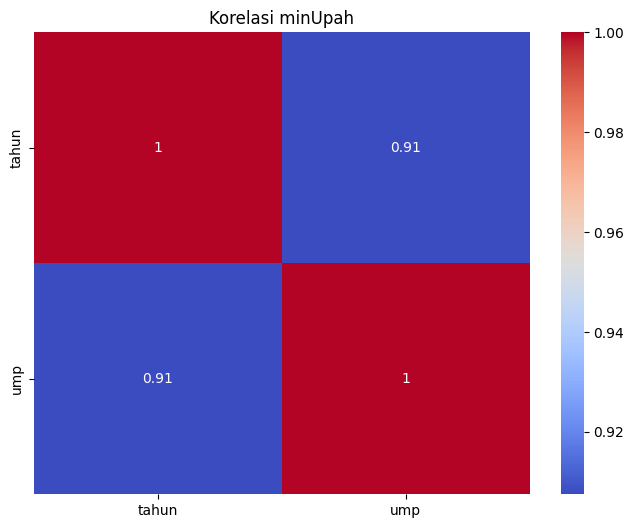

In [7]:
print("\nDistribusi dan Kolerasi")
def distribusi_korelasi(df, nama_df):
    print(f"\nDistribusi dan Korelasi {nama_df}:")
    deskripsi = df.describe().T
    print(deskripsi.iloc[:3, :3])

    # Visualisasi (histogram, boxplot, heatmap)
    numerik = df.select_dtypes(include=['number']).columns
    for kolom in numerik:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[kolom], kde=True)
        plt.title(f"Distribusi {kolom}")
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[kolom])
        plt.title(f"Boxplot {kolom}")
        plt.show()

    if len(numerik) > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[numerik].corr(), annot=True, cmap='coolwarm')
        plt.title(f"Korelasi {nama_df}")
        plt.show()

distribusi_korelasi(df_rata_upah, "rataRataUpah")
distribusi_korelasi(df_pengeluaran, "pengeluaran")
distribusi_korelasi(df_garis_kemiskinan, "garisKemiskinan")
distribusi_korelasi(df_min_upah, "minUpah")

**Insight:**

Data menunjukkan bahwa rata-rata upah adalah sekitar 16,6 juta dari 280 data. Pengeluaran rata-rata sebesar 601 ribu dari 4.620 data, tetapi ada 108 data yang kosong. Garis kemiskinan rata-rata sebesar 303 ribu dari 5.460 data, dengan 199 data yang hilang. Upah minimum rata-rata 1,4 juta dari 735 data, tapi ada 24 data yang kosong. Beberapa kolom di dataset ini memiliki data yang tidak lengkap.


Visualisasi Data Kategorikal

Visualisasi Data Kategorikal rataRataUpah:


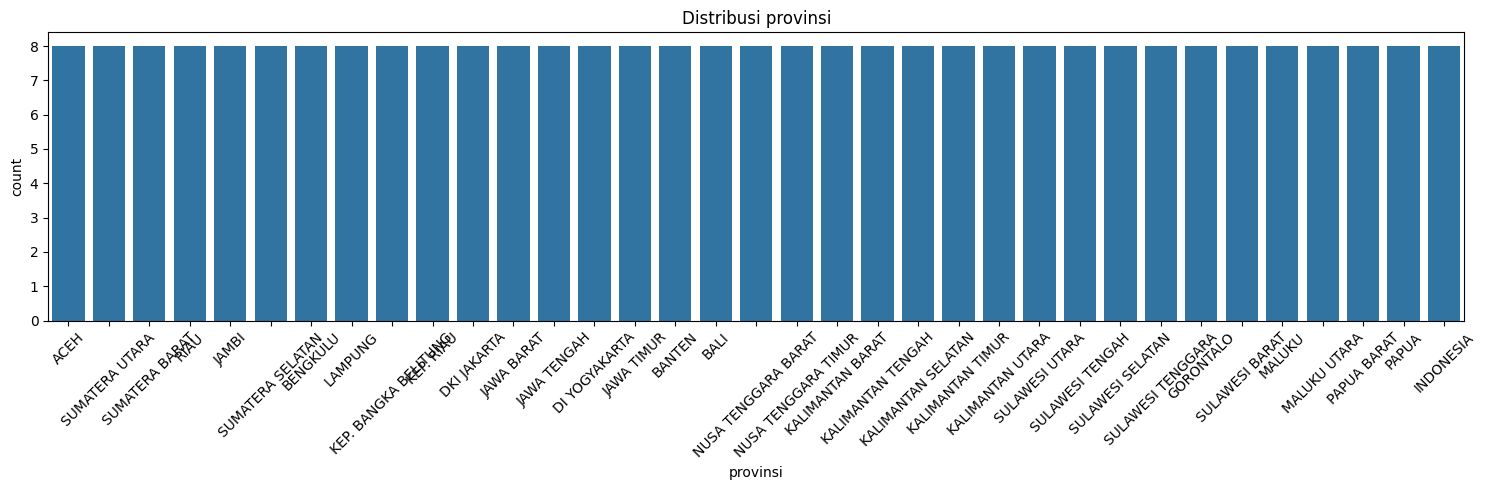


Visualisasi Data Kategorikal pengeluaran:


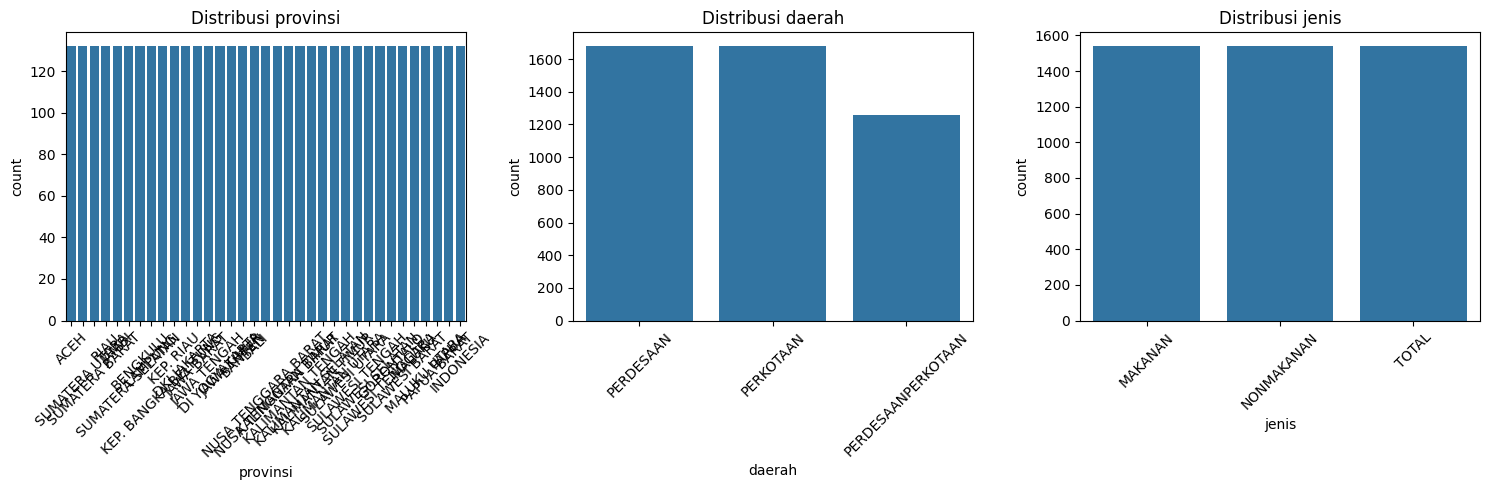


Visualisasi Data Kategorikal garisKemiskinan:


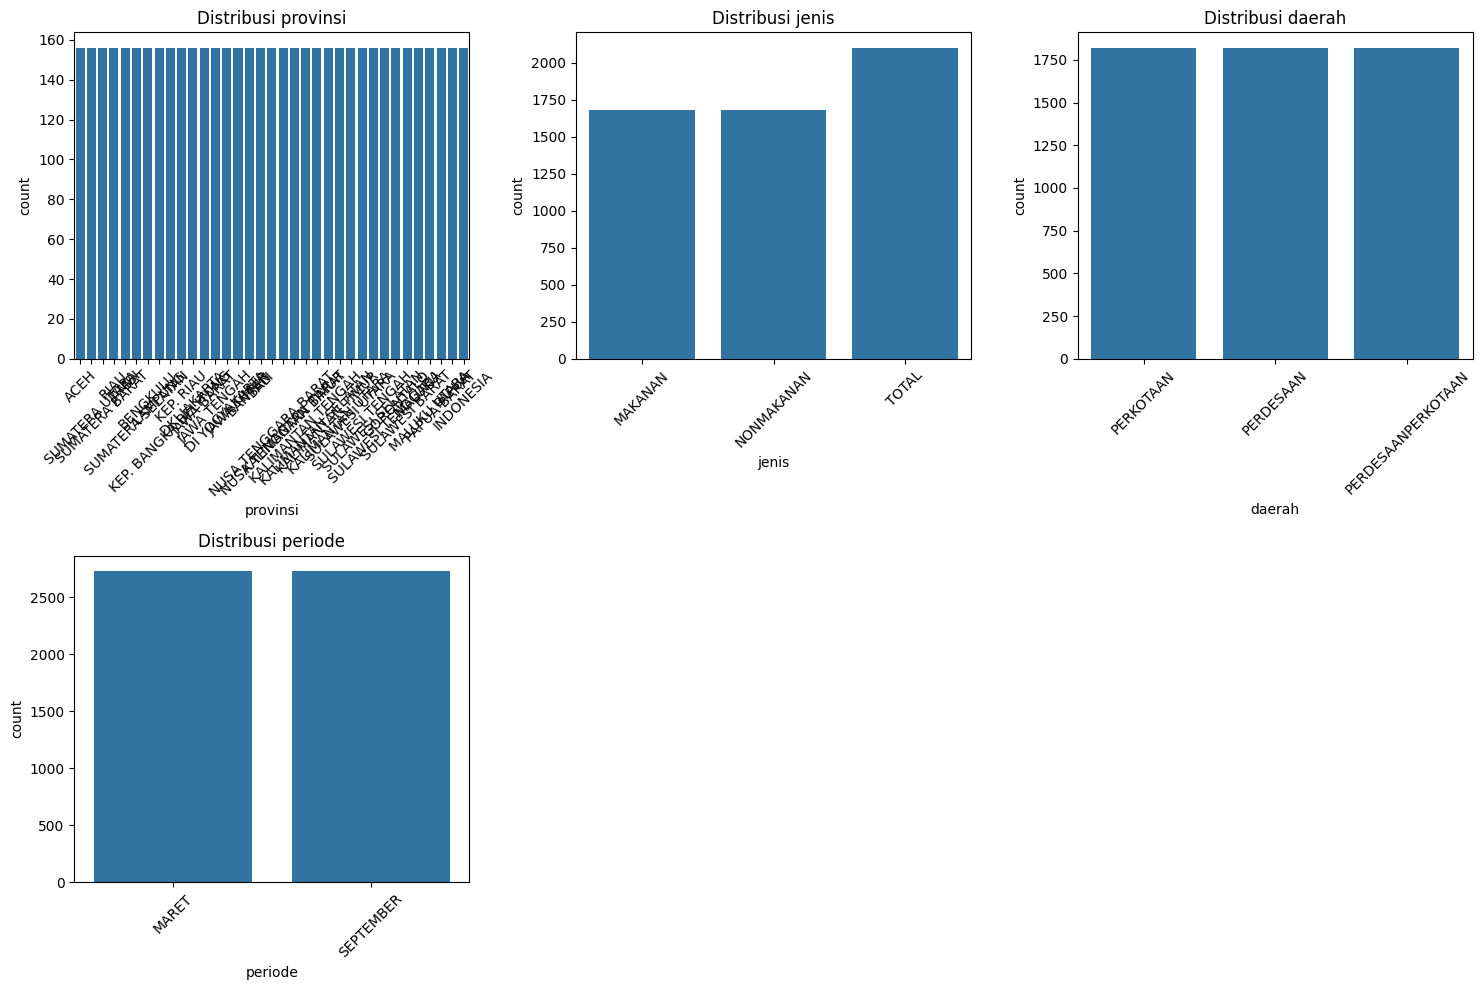


Visualisasi Data Kategorikal minUpah:


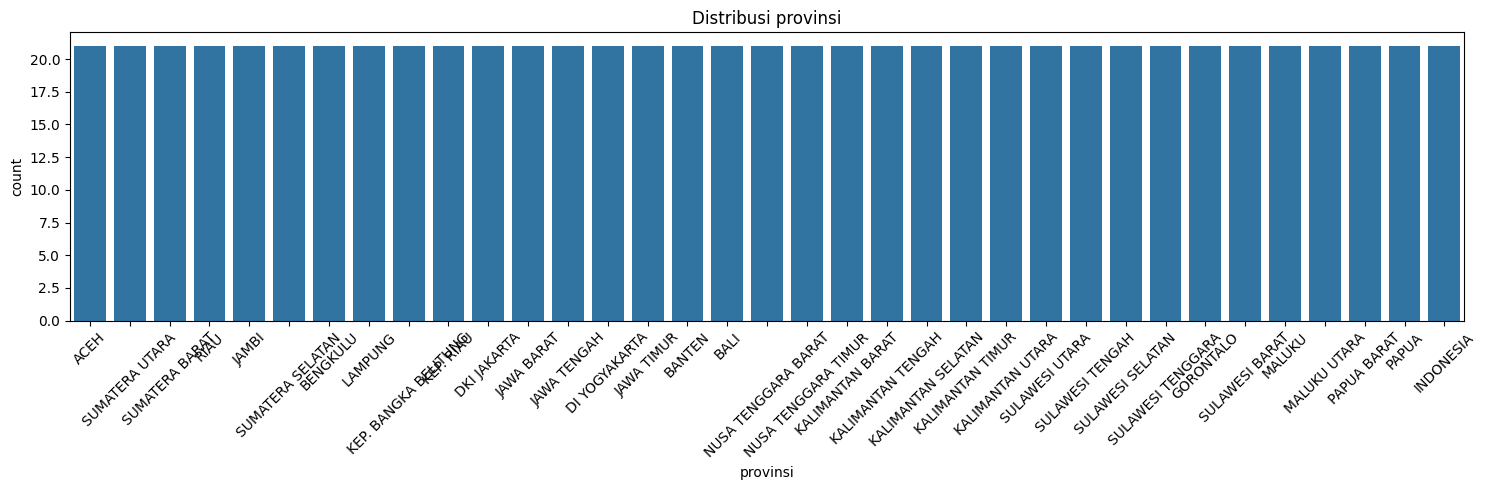

In [8]:
print("\nVisualisasi Data Kategorikal")
def visualisasi_kategorikal(df, nama_df):
    print(f"\nVisualisasi Data Kategorikal {nama_df}:")

    kategorikal = df.select_dtypes(include=['object']).columns
    n_kolom = len(kategorikal)
    n_baris = (n_kolom + 2) // 3

    fig, axes = plt.subplots(n_baris, min(n_kolom, 3), figsize=(15, 5 * n_baris))


    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])

    axes = axes.flatten()

    for i, kolom in enumerate(kategorikal):
        sns.countplot(x=df[kolom], ax=axes[i])
        axes[i].set_title(f"Distribusi {kolom}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

visualisasi_kategorikal(df_rata_upah, "rataRataUpah")
visualisasi_kategorikal(df_pengeluaran, "pengeluaran")
visualisasi_kategorikal(df_garis_kemiskinan, "garisKemiskinan")
visualisasi_kategorikal(df_min_upah, "minUpah")

**insight:**

Grafik menunjukkan distribusi data berdasarkan beberapa kategori. Pada rata-rata upah, setiap provinsi memiliki jumlah data yang seimbang. Untuk pengeluaran, data tersebar merata di berbagai provinsi, dengan mayoritas berasal dari perkotaan dan pedesaan, sementara perkebunan/pertanian memiliki data lebih sedikit. Berdasarkan jenis pengeluaran, kategori makanan, bukan makanan, dan total memiliki jumlah data yang hampir sama. Dari sisi periode waktu, data hanya ada di dua bulan, yaitu Maret dan September, dengan jumlah yang seimbang.

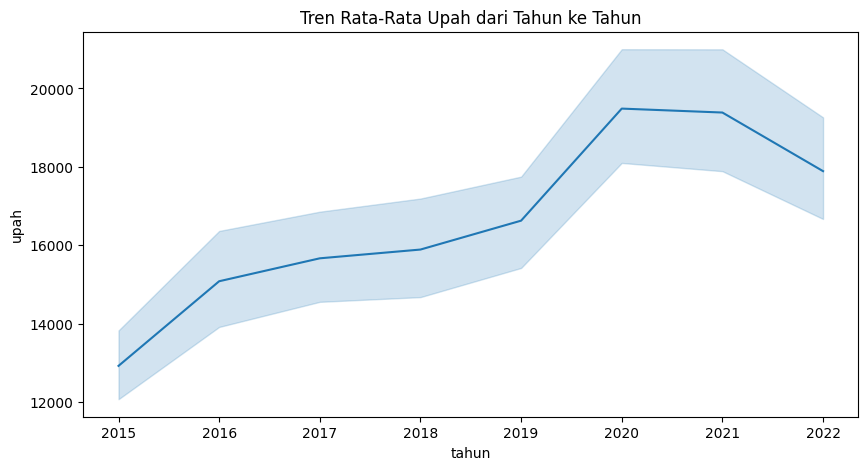

In [9]:
# 1. Analisis Time Series (Tren Upah)
plt.figure(figsize=(10, 5))
sns.lineplot(x='tahun', y='upah', data=df_rata_upah)
plt.title('Tren Rata-Rata Upah dari Tahun ke Tahun')
plt.show()

**Insight**:

Pada rata-rata upah, setiap provinsi memiliki jumlah data yang seimbang. Untuk pengeluaran, data tersebar merata di berbagai provinsi, dengan mayoritas berasal dari perkotaan dan pedesaan, sementara perkebunan/pertanian memiliki data lebih sedikit. Berdasarkan jenis pengeluaran, kategori makanan, bukan makanan, dan total memiliki jumlah data yang hampir sama. Dari sisi periode waktu, data hanya ada di dua bulan, yaitu Maret dan September, dengan jumlah yang seimbang.

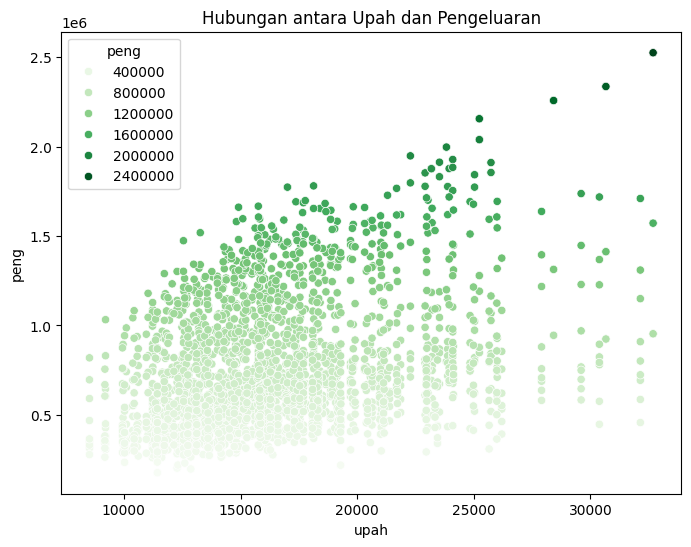

Korelasi Upah vs. Pengeluaran:
          upah      peng
upah  1.000000  0.368419
peng  0.368419  1.000000


In [10]:
# 2.Upah vs. Pengeluaran
df_gabungan = pd.merge(df_rata_upah, df_pengeluaran, on=['provinsi', 'tahun'])

plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Greens", as_cmap=True)
sns.scatterplot(x='upah', y='peng', hue='peng', data=df_gabungan, palette=cmap)

plt.title("Hubungan antara Upah dan Pengeluaran")
plt.show()

print("Korelasi Upah vs. Pengeluaran:")
print(df_gabungan[['upah', 'peng']].corr())

**Insight:**

Diagram ini menunjukkan bahwa, biasanya, semakin besar gaji seseorang, semakin besar pula pengeluarannya. Tetapi, ini bukan aturan yang pasti, karena setiap orang punya kebiasaan keuangan yang berbeda.

Text(0.5, 1.0, 'Boxplot Upah (Deteksi Outlier)')

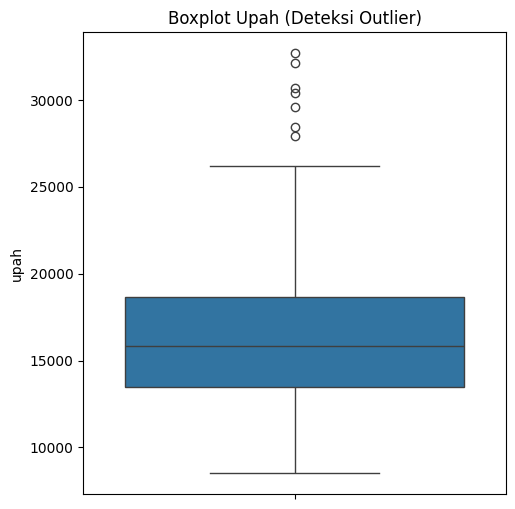

In [11]:
# Outlier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_rata_upah['upah'])
plt.title('Boxplot Upah (Deteksi Outlier)')

**insight**

Boxplot menunjukkan rentang upah yang paling umum, dengan kotak yang mewakili sebagian besar data dan garis di dalamnya sebagai median. Titik-titik di luar "whisker" boxplot menandakan outlier, yaitu upah yang sangat berbeda dari rata-rata

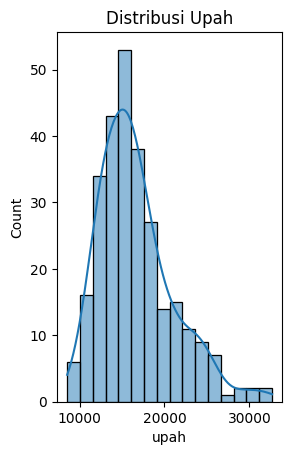

In [12]:
plt.subplot(1, 2, 2)
sns.histplot(df_rata_upah['upah'], kde=True)
plt.title('Distribusi Upah')
plt.show()

**insight:**

Distribusi upah tidak merata, artinya ada lebih banyak orang dengan upah di rentang tertentu daripada di rentang lainnya.

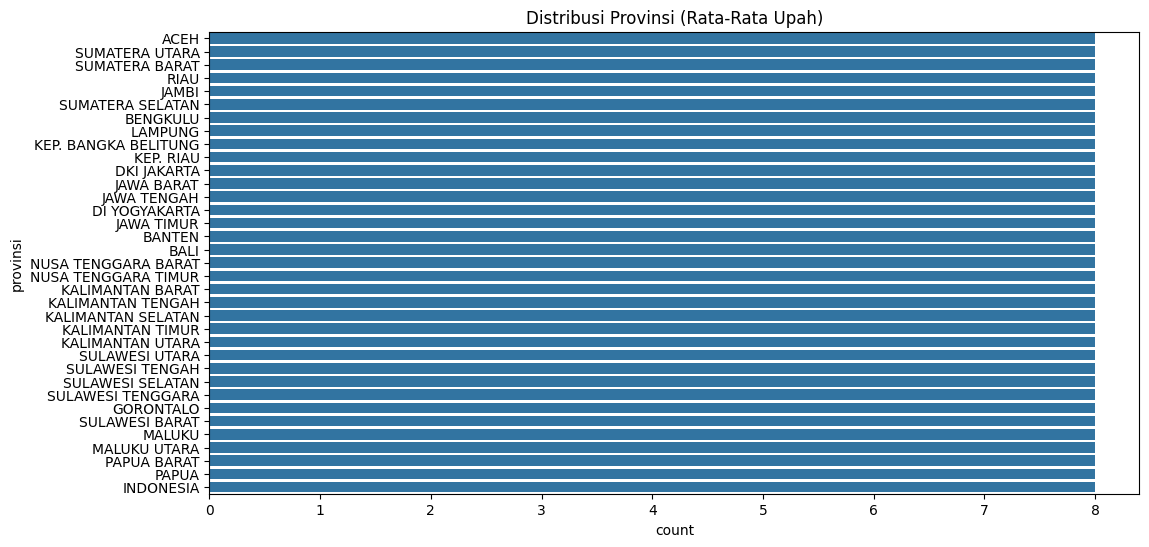

In [13]:
# Distribusi Provinsi
plt.figure(figsize=(12, 6))
sns.countplot(y='provinsi', data=df_rata_upah, order=df_rata_upah['provinsi'].value_counts().index)
plt.title('Distribusi Provinsi (Rata-Rata Upah)')
plt.show()

**Insight:**

Diagram ini menunjukkan perbandingan rata-rata upah di berbagai provinsi di Indonesia. Setiap batang horizontal mewakili satu provinsi, dan panjang batang tersebut menunjukkan seberapa tinggi rata-rata upah di provinsi tersebut

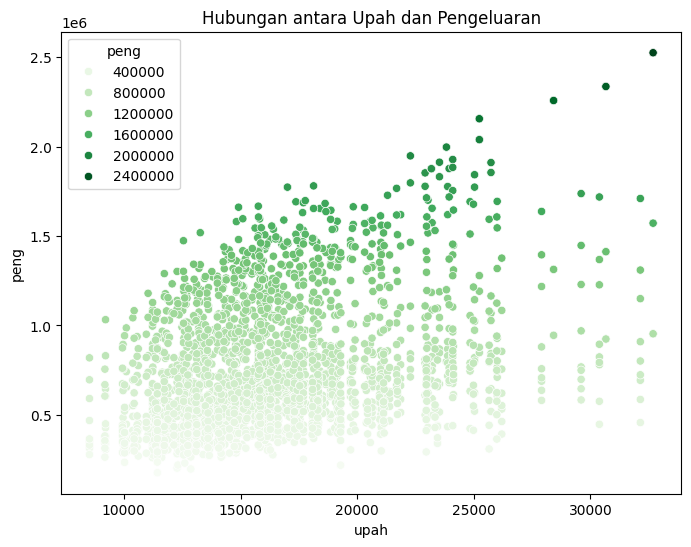

Korelasi Upah vs. Pengeluaran:
          upah      peng
upah  1.000000  0.368419
peng  0.368419  1.000000
Korelasi Garis Kemiskinan vs. Upah Minimum:
           gk       ump
gk   1.000000  0.264894
ump  0.264894  1.000000


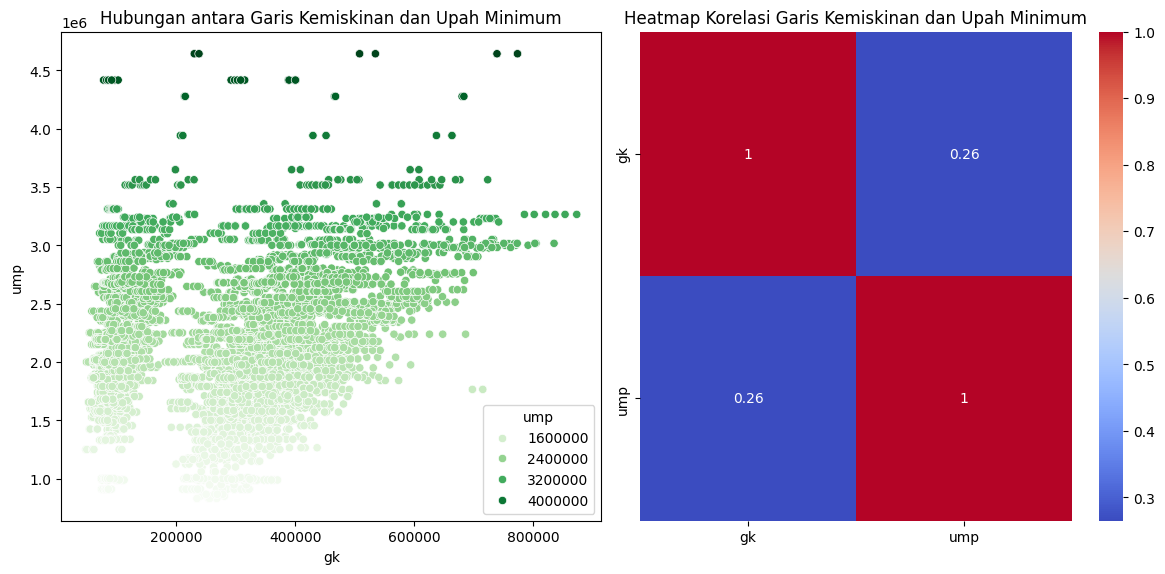

In [14]:
# Garis Kemiskinan vs. Upah Minimum
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Greens", as_cmap=True)
sns.scatterplot(x='upah', y='peng', hue='peng', data=df_gabungan, palette=cmap)

plt.title("Hubungan antara Upah dan Pengeluaran")
plt.show()
print("Korelasi Upah vs. Pengeluaran:")
print(df_gabungan[['upah', 'peng']].corr())

df_gabungan_kemiskinan = pd.merge(df_garis_kemiskinan, df_min_upah, on=['provinsi', 'tahun'])
print("Korelasi Garis Kemiskinan vs. Upah Minimum:")
print(df_gabungan_kemiskinan[['gk', 'ump']].corr())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cmap_kemiskinan = sns.color_palette("Greens", as_cmap=True)
sns.scatterplot(x='gk', y='ump', hue='ump', data=df_gabungan_kemiskinan, palette=cmap_kemiskinan)
plt.title('Hubungan antara Garis Kemiskinan dan Upah Minimum')

plt.subplot(1, 2, 2)
sns.heatmap(df_gabungan_kemiskinan[['gk', 'ump']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Garis Kemiskinan dan Upah Minimum')

plt.tight_layout()
plt.show()

insight:
* Terdapat kecenderungan bahwa daerah dengan garis kemiskinan yang lebih tinggi memiliki upah minimum yang juga lebih tinggi.
* Namun, karena hubungan korelasinya lemah, ini menunjukkan bahwa naik turunnya upah minimum tidak sepenuhnya dipengaruhi oleh garis kemiskinan saja. Ada faktor lain yang kemungkinan lebih dominan memengaruhi penentuan upah minimum

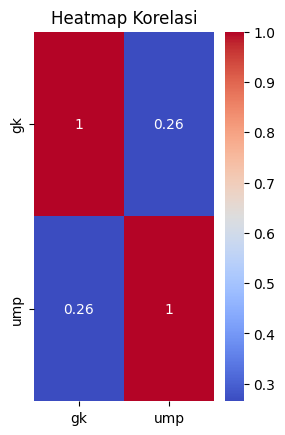

In [15]:
plt.subplot(1, 2, 2)
sns.heatmap(df_gabungan_kemiskinan[['gk', 'ump']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

**insight:**

ada kecenderungan bahwa daerah dengan garis kemiskinan yang lebih tinggi juga memiliki upah minimum yang lebih tinggi. Ini terlihat dari titik-titik biru yang membentuk pola naik ke atas.

Namun, pola ini tidak selalu lurus atau sempurna. Ada daerah dengan garis kemiskinan yang sama tetapi upah minimumnya berbeda. Ada juga daerah dengan garis kemiskinan tinggi tetapi upah minimumnya tidak terlalu besar.

Diagram ini memberikan informasi visualisasi, dimana kita dapat melihat adanya korelasi positif yang lemag antara garis kemiskinan dan upah minimum. Artinya, kenaikan garis kemiskinan tidak selalu diiringi kenaikan upah minimum yang signifikan, atau sebaliknya ada Faktor lain mungkin juga mempengaruhi upah minimum selain garis kemiskinan.

In [16]:
from scipy.stats import chi2_contingency
df_gabungan = pd.merge(df_rata_upah, df_pengeluaran, on=['provinsi', 'tahun'])

crosstab = pd.crosstab(df_gabungan['provinsi'], df_gabungan['jenis'])
print("\nCrosstab Provinsi vs. Jenis:")
print(crosstab)

chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"\nChi-Square Test: chi2={chi2}, p={p}")


Crosstab Provinsi vs. Jenis:
jenis                 MAKANAN  NONMAKANAN  TOTAL
provinsi                                        
ACEH                       24          24     24
BALI                       24          24     24
BANTEN                     24          24     24
BENGKULU                   24          24     24
DI YOGYAKARTA              24          24     24
DKI JAKARTA                24          24     24
GORONTALO                  24          24     24
INDONESIA                  24          24     24
JAMBI                      24          24     24
JAWA BARAT                 24          24     24
JAWA TENGAH                24          24     24
JAWA TIMUR                 24          24     24
KALIMANTAN BARAT           24          24     24
KALIMANTAN SELATAN         24          24     24
KALIMANTAN TENGAH          24          24     24
KALIMANTAN TIMUR           24          24     24
KALIMANTAN UTARA           24          24     24
KEP. BANGKA BELITUNG       24          

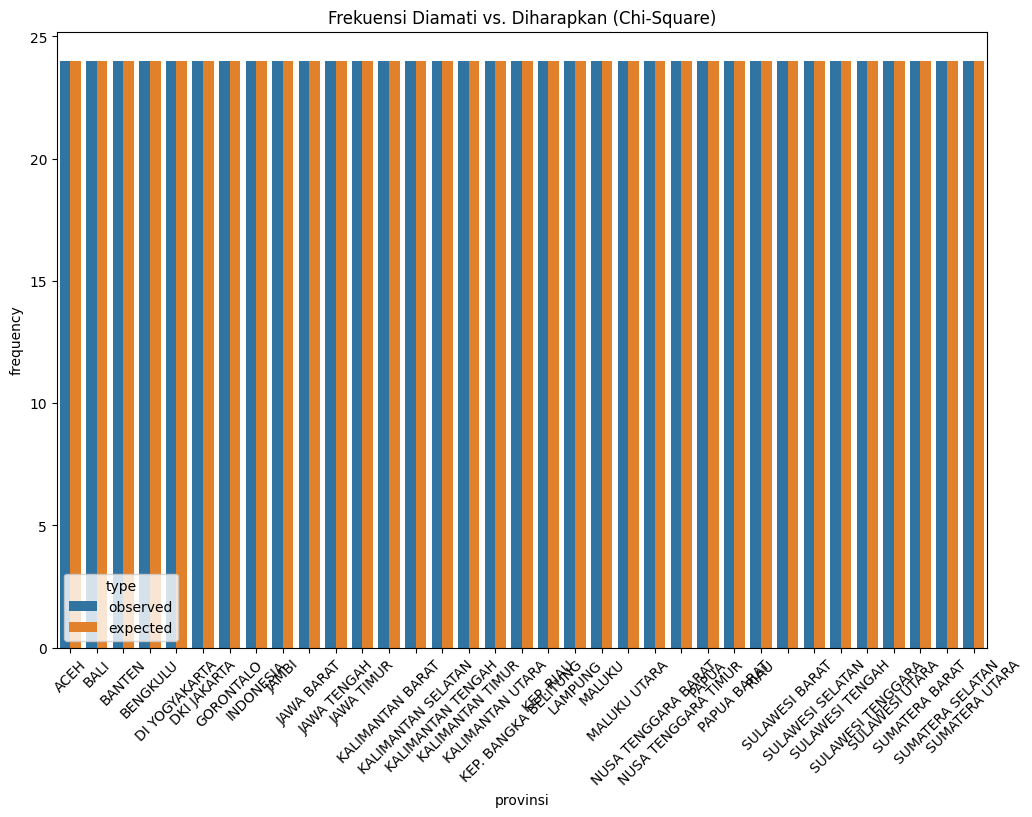

In [17]:
# Visualisasi Chi-Square (Bar Plot Frekuensi Diamati vs. Diharapkan)
expected_df = pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns)
expected_df = expected_df.stack().reset_index(name='expected')
observed_df = crosstab.stack().reset_index(name='observed')
comparison_df = pd.merge(observed_df, expected_df, on=['provinsi', 'jenis'])
comparison_df = comparison_df.melt(id_vars=['provinsi', 'jenis'], value_vars=['observed', 'expected'], var_name='type', value_name='frequency')
plt.figure(figsize=(12, 8))
sns.barplot(x='provinsi', y='frequency', hue='type', data=comparison_df)
plt.title('Frekuensi Diamati vs. Diharapkan (Chi-Square)')
plt.xticks(rotation=45)
plt.show()


Regresi Linear Upah vs. Pengeluaran: intercept=277548.39700573444, coef=[29.00412967]


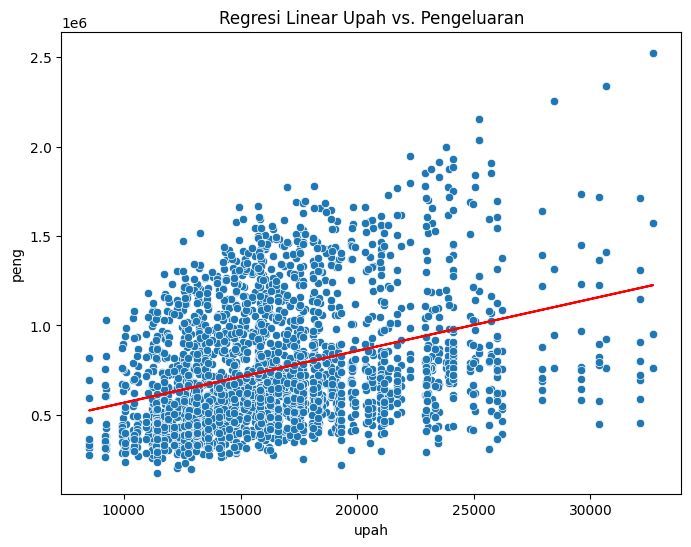

In [18]:
df_gabungan['peng'] = df_gabungan['peng'].fillna(df_gabungan['peng'].mean())

# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_gabungan[['upah']], df_gabungan['peng'])
print(f"\nRegresi Linear Upah vs. Pengeluaran: intercept={model.intercept_}, coef={model.coef_}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='upah', y='peng', data=df_gabungan)
plt.plot(df_gabungan['upah'], model.predict(df_gabungan[['upah']]), color='red')
plt.title('Regresi Linear Upah vs. Pengeluaran')
plt.show()


Regresi Polinomial Upah vs. Pengeluaran: intercept=60101.12147977669, coef=[ 0.00000000e+00  5.37260376e+01 -6.55110899e-04]


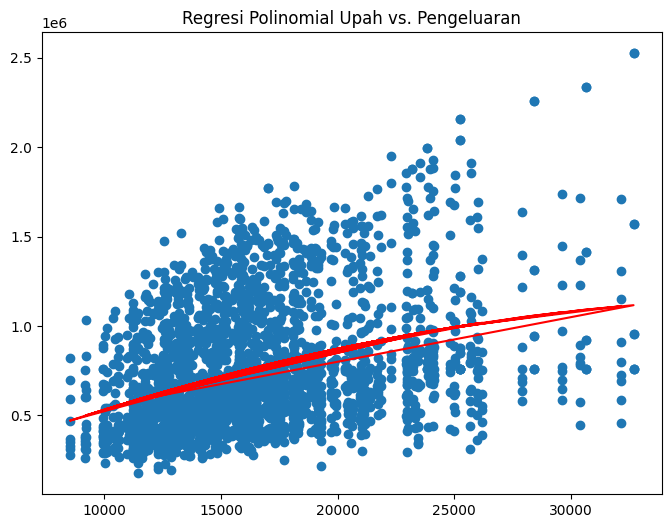

In [19]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
upah_poly = poly.fit_transform(df_gabungan[['upah']])
model_poly = LinearRegression()
model_poly.fit(upah_poly, df_gabungan['peng'])
print(f"\nRegresi Polinomial Upah vs. Pengeluaran: intercept={model_poly.intercept_}, coef={model_poly.coef_}")

plt.figure(figsize=(8, 6))
plt.scatter(df_gabungan['upah'], df_gabungan['peng'])
plt.plot(df_gabungan['upah'], model_poly.predict(upah_poly), color='red')
plt.title('Regresi Polinomial Upah vs. Pengeluaran')
plt.show()

**insight:**

* Setiap titik biru mewakili data individu, dengan sumbu horizontal menunjukkan upah dan sumbu vertikal menunjukkan pengeluaran.
* Secara umum, kita bisa melihat adanya korelasi positif, yang berarti semakin tinggi upah, semakin tinggi pula pengeluaran.
* Garis merah adalah hasil dari regresi polinomial, yang mencoba menemukan pola terbaik dalam data.
* Garis ini menunjukkan perkiraan hubungan antara upah dan pengeluaran berdasarkan data yang ada.
* Dalam kasus ini, garisnya melengkung sedikit, menunjukkan bahwa hubungan antara upah dan pengeluaran mungkin tidak sepenuhnya linier.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [20]:
# Missing values

print("Missing Value df_rata_upah:\n", df_rata_upah.isnull().sum())
print("\nMissing Value df_pengeluaran:\n", df_pengeluaran.isnull().sum())
print("\nMissing Value df_garis_kemiskinan:\n", df_garis_kemiskinan.isnull().sum())
print("\nMissing Value df_min_upah:\n", df_min_upah.isnull().sum())

Missing Value df_rata_upah:
 provinsi    0
tahun       0
upah        0
dtype: int64

Missing Value df_pengeluaran:
 provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

Missing Value df_garis_kemiskinan:
 provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Missing Value df_min_upah:
 provinsi     0
tahun        0
ump         24
dtype: int64


In [21]:
from sklearn.impute import SimpleImputer

In [22]:
def clean_missing_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                # Imputasi nilai rata-rata untuk kolom numerik
                imputer = SimpleImputer(strategy='mean')
                df[col] = imputer.fit_transform(df[[col]])
            else:
                # Imputasi nilai modus untuk kolom kategorikal
                df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [23]:
df_rata_upah = clean_missing_values(df_rata_upah)
df_pengeluaran = clean_missing_values(df_pengeluaran)
df_garis_kemiskinan = clean_missing_values(df_garis_kemiskinan)
df_min_upah = clean_missing_values(df_min_upah)

In [24]:
print("Missing Value df_rata_upah:\n", df_rata_upah.isnull().sum())
print("\nMissing Value df_pengeluaran:\n", df_pengeluaran.isnull().sum())
print("\nMissing Value df_garis_kemiskinan:\n", df_garis_kemiskinan.isnull().sum())
print("\nMissing Value df_min_upah:\n", df_min_upah.isnull().sum())

Missing Value df_rata_upah:
 provinsi    0
tahun       0
upah        0
dtype: int64

Missing Value df_pengeluaran:
 provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

Missing Value df_garis_kemiskinan:
 provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

Missing Value df_min_upah:
 provinsi    0
tahun       0
ump         0
dtype: int64


In [25]:
# Data duplicate

def find_duplicates(df):
    duplicates = df.duplicated()
    return duplicates.sum()

In [26]:
print("Jumlah data duplikat df_rata_upah:", find_duplicates(df_rata_upah))
print("Jumlah data duplikat df_pengeluaran:", find_duplicates(df_pengeluaran))
print("Jumlah data duplikat df_garis_kemiskinan:", find_duplicates(df_garis_kemiskinan))
print("Jumlah data duplikat df_min_upah:", find_duplicates(df_min_upah))

Jumlah data duplikat df_rata_upah: 0
Jumlah data duplikat df_pengeluaran: 0
Jumlah data duplikat df_garis_kemiskinan: 0
Jumlah data duplikat df_min_upah: 0


In [27]:
#normalization

from sklearn.preprocessing import MinMaxScaler

In [28]:
def normalize_features(df, numeric_cols):
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

In [29]:
numeric_cols_rata_upah = ['upah']
numeric_cols_pengeluaran = ['peng']
numeric_cols_garis_kemiskinan = ['gk']
numeric_cols_min_upah = ['ump']

In [30]:
print("df_rata_upah (normalized):\n", df_rata_upah.head())
print("\ndf_pengeluaran (normalized):\n", df_pengeluaran.head())
print("\ndf_garis_kemiskinan (normalized):\n", df_garis_kemiskinan.head())
print("\ndf_min_upah (normalized):\n", df_min_upah.head())

df_rata_upah (normalized):
   provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065

df_pengeluaran (normalized):
   provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0

df_garis_kemiskinan (normalized):
   provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0

df_min_upah (normalized):
   provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2

In [31]:
def detect_outliers_iqr(df, numeric_cols):
    outlier_indices = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers
    return outlier_indices

In [32]:
numeric_cols_rata_upah = ['upah']
numeric_cols_pengeluaran = ['peng']
numeric_cols_garis_kemiskinan = ['gk']
numeric_cols_min_upah = ['ump']

outliers_rata_upah = detect_outliers_iqr(df_rata_upah, numeric_cols_rata_upah)
outliers_pengeluaran = detect_outliers_iqr(df_pengeluaran, numeric_cols_pengeluaran)
outliers_garis_kemiskinan = detect_outliers_iqr(df_garis_kemiskinan, numeric_cols_garis_kemiskinan)
outliers_min_upah = detect_outliers_iqr(df_min_upah, numeric_cols_min_upah)

In [33]:
print("Outlier df_rata_upah:\n", outliers_rata_upah)
print("\nOutlier df_pengeluaran:\n", outliers_pengeluaran)
print("\nOutlier df_garis_kemiskinan:\n", outliers_garis_kemiskinan)
print("\nOutlier df_min_upah:\n", outliers_min_upah)

Outlier df_rata_upah:
 {'upah': Index([85, 86, 87, 261, 262, 269, 270], dtype='int64')}

Outlier df_pengeluaran:
 {'peng': Index([  93,   94,   95,  227,  355,  356,  357,  358,  359,  487,
       ...
       4448, 4449, 4450, 4451, 4486, 4487, 4580, 4581, 4582, 4583],
      dtype='int64', length=210)}

Outlier df_garis_kemiskinan:
 {'gk': Index([1395, 1397, 1398, 1399, 1402, 1403, 3734, 3735, 3743], dtype='int64')}

Outlier df_min_upah:
 {'ump': Index([228, 230, 607], dtype='int64')}


**insight:**

* df_rata_upah:
Jumlah outlier relatif sedikit (7).

* df_pengeluaran:
Jumlah outlier cukup banyak (210).

* df_garis_kemiskinan:
Jumlah outlier relatif sedikit (9).

* df_min_upah:
Jumlah outlier sangat sedikit (3).
Anda dapat menghapus outlier tersebut tanpa kehilangan data yang signifikan.

In [34]:
def remove_outliers(df, outlier_indices):
    all_outliers = sorted(set(sum(outlier_indices.values(), [])))
    df_cleaned = df.drop(all_outliers).reset_index(drop=True)
    return df_cleaned

# Tentukan kolom numerik untuk setiap DataFrame
numeric_cols_rata_upah = ['upah']
numeric_cols_pengeluaran = ['peng']
numeric_cols_garis_kemiskinan = ['gk']
numeric_cols_min_upah = ['ump']

outliers_rata_upah = detect_outliers_iqr(df_rata_upah, numeric_cols_rata_upah)
outliers_pengeluaran = detect_outliers_iqr(df_pengeluaran, numeric_cols_pengeluaran)
outliers_garis_kemiskinan = detect_outliers_iqr(df_garis_kemiskinan, numeric_cols_garis_kemiskinan)
outliers_min_upah = detect_outliers_iqr(df_min_upah, numeric_cols_min_upah)

In [35]:
def remove_outliers(df, outlier_indices):
    # Extract all outlier indices from the dictionary values
    all_outliers = []
    for column_indices in outlier_indices.values():
        if column_indices.any():  # Check if there are any outliers
            all_outliers.extend(column_indices)
    # Remove duplicate indices and sort them
    all_outliers = sorted(list(set(all_outliers)))
    # Drop outliers and reset the index
    df_cleaned = df.drop(all_outliers).reset_index(drop=True)
    return df_cleaned

In [36]:
df_rata_upah_cleaned = remove_outliers(df_rata_upah, outliers_rata_upah)
df_pengeluaran_cleaned = remove_outliers(df_pengeluaran, outliers_pengeluaran)
df_garis_kemiskinan_cleaned = remove_outliers(df_garis_kemiskinan, outliers_garis_kemiskinan)
df_min_upah_cleaned = remove_outliers(df_min_upah, outliers_min_upah)

print("df_rata_upah (cleaned):\n", df_rata_upah_cleaned.head())
print("\ndf_pengeluaran (imputed):\n", df_pengeluaran.head())
print("\ndf_garis_kemiskinan (cleaned):\n", df_garis_kemiskinan_cleaned.head())
print("\ndf_min_upah (cleaned):\n", df_min_upah_cleaned.head())

df_rata_upah (cleaned):
   provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065

df_pengeluaran (imputed):
   provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0

df_garis_kemiskinan (cleaned):
   provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0

df_min_upah (cleaned):
   provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   

In [37]:
def encode_categorical(df, categorical_cols):
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [38]:
categorical_cols_rata_upah = ['provinsi']
categorical_cols_pengeluaran = ['provinsi', 'daerah', 'jenis']
categorical_cols_garis_kemiskinan = ['provinsi', 'daerah', 'jenis', 'periode']
categorical_cols_min_upah = ['provinsi']

df_rata_upah = encode_categorical(df_rata_upah, categorical_cols_rata_upah)
df_pengeluaran = encode_categorical(df_pengeluaran, categorical_cols_pengeluaran)
df_garis_kemiskinan = encode_categorical(df_garis_kemiskinan, categorical_cols_garis_kemiskinan)
df_min_upah = encode_categorical(df_min_upah, categorical_cols_min_upah)

In [39]:
def bin_numeric(df, numeric_col, bins, labels):
    df[numeric_col + '_binned'] = pd.cut(df[numeric_col], bins=bins, labels=labels)
    return df

In [40]:
bins_upah = [df_rata_upah['upah'].min(), df_rata_upah['upah'].quantile(0.33), df_rata_upah['upah'].quantile(0.66), df_rata_upah['upah'].max()]
labels_upah = ['rendah', 'sedang', 'tinggi']
df_rata_upah = bin_numeric(df_rata_upah, 'upah', bins_upah, labels_upah)

In [41]:
print("df_rata_upah (encoded and binned):\n", df_rata_upah.head())
print("\ndf_pengeluaran (encoded):\n", df_pengeluaran.head())
print("\ndf_garis_kemiskinan (encoded):\n", df_garis_kemiskinan.head())
print("\ndf_min_upah (encoded):\n", df_min_upah.head())

df_rata_upah (encoded and binned):
    provinsi  tahun   upah upah_binned
0         0   2015  11226      rendah
1         0   2016  13627      rendah
2         0   2017  14809      sedang
3         0   2018  13814      rendah
4         0   2019  15065      sedang

df_pengeluaran (encoded):
    provinsi  daerah  jenis  tahun      peng
0         0       0      0   2007  195176.0
1         0       0      0   2008  218781.0
2         0       0      0   2009  247427.0
3         0       0      0   2010  275749.0
4         0       0      0   2011  308000.0

df_garis_kemiskinan (encoded):
    provinsi  jenis  daerah  tahun  periode        gk
0         0      0       2   2015        0  293697.0
1         0      0       2   2015        1  302128.0
2         0      0       2   2016        0  306243.0
3         0      0       2   2016        1  319768.0
4         0      0       0   2015        0  297479.0

df_min_upah (encoded):
    provinsi  tahun       ump
0         0   2002  330000.0
1         

In [42]:
# binning

bins_upah = [df_rata_upah['upah'].min(), df_rata_upah['upah'].quantile(0.33), df_rata_upah['upah'].quantile(0.66), df_rata_upah['upah'].max()]
labels_upah = ['rendah', 'sedang', 'tinggi']
df_rata_upah['upah_binned_cut'] = pd.cut(df_rata_upah['upah'], bins=bins_upah, labels=labels_upah)

# Cetak beberapa baris pertama dari DataFrame yang telah di-bin
print("df_rata_upah (binned using pd.cut()):\n", df_rata_upah[['upah', 'upah_binned_cut']].head())

df_rata_upah (binned using pd.cut()):
     upah upah_binned_cut
0  11226          rendah
1  13627          rendah
2  14809          sedang
3  13814          rendah
4  15065          sedang


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

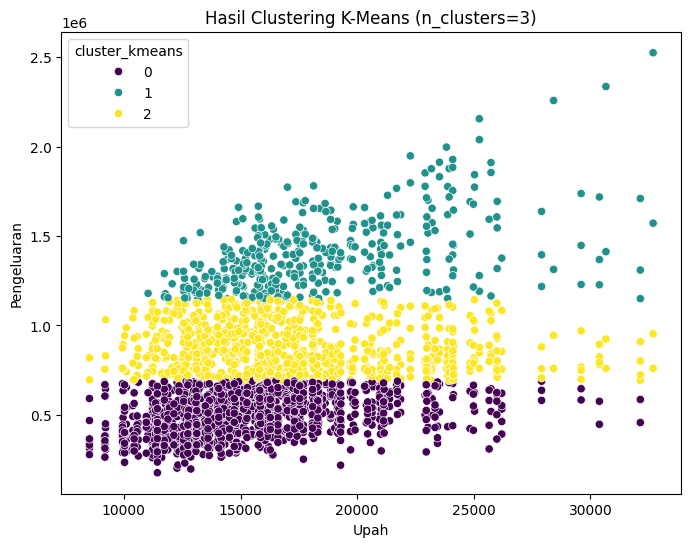


Karakteristik Cluster K-Means:
                        upah          peng
cluster_kmeans                            
0               15410.595431  5.069617e+05
1               18937.308901  1.420380e+06
2               17591.186940  8.754495e+05


In [43]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# 2. Latih model dengan data dan dapatkan label cluster
df_gabungan['cluster_kmeans'] = kmeans.fit_predict(df_gabungan[['upah', 'peng']])

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='upah', y='peng', hue='cluster_kmeans', palette='viridis', data=df_gabungan)
plt.title(f'Hasil Clustering K-Means (n_clusters={n_clusters})')
plt.xlabel('Upah')
plt.ylabel('Pengeluaran')
plt.show()

# Analisis karakteristik setiap cluster (opsional)
print("\nKarakteristik Cluster K-Means:")
print(df_gabungan.groupby('cluster_kmeans')[['upah', 'peng']].mean())

Hasil visualisasi menunjukkan bahwa data berhasil dikelompokkan menjadi tiga klaster berdasarkan variabel upah dan pengeluaran menggunakan metode K-Means. Masing-masing klaster memiliki karakteristik ekonomi yang berbeda:

1. Klaster 0 (warna ungu) merepresentasikan kelompok dengan rata-rata upah dan pengeluaran paling rendah. Kelompok ini kemungkinan besar berada dalam kategori masyarakat ekonomi bawah.

2. Klaster 1 (warna biru) merupakan kelompok dengan upah dan pengeluaran tertinggi di antara ketiga klaster. Ini menunjukkan representasi dari masyarakat ekonomi atas.

3. Klaster 2 (warna kuning) berada di tengah-tengah, dengan rata-rata upah dan pengeluaran yang moderat. Klaster ini dapat dikategorikan sebagai kelompok ekonomi menengah.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [45]:
# Fitur untuk clustering
features_for_clustering = ['upah', 'peng']
X = df_gabungan[features_for_clustering].copy()

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

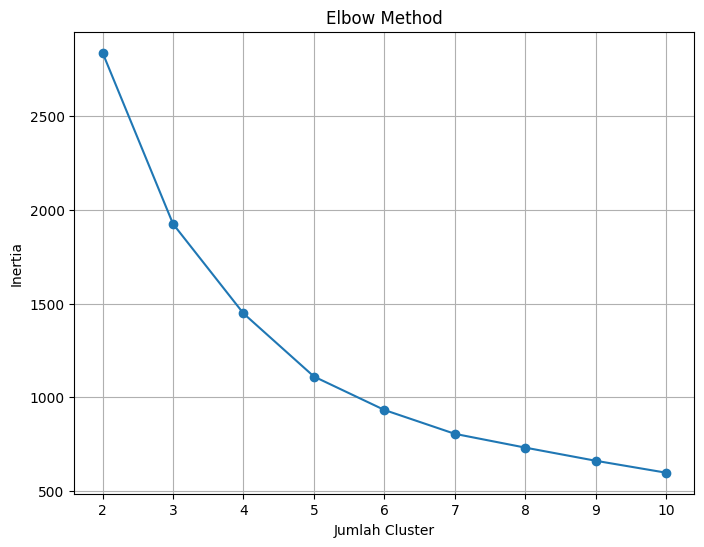

In [46]:
# Elbow Method

inertia = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

Insight:

Berdasarkan grafik Elbow Method, titik "siku" terlihat paling jelas saat jumlah klaster adalah 3. Ini menunjukkan bahwa 3 klaster merupakan jumlah yang paling optimal untuk mengelompokkan data.

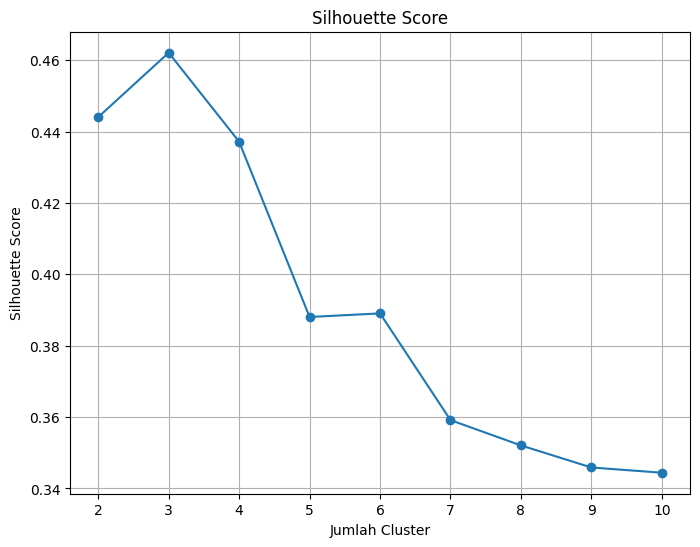

In [47]:
# Silhouette Score

silhouette_scores = [] # Re-initialize the list
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

Insight:
* Grafik menunjukkan nilai silhouette score untuk jumlah cluster dari 2 hingga 10.

* Nilai tertinggi terjadi saat jumlah cluster = 3, yaitu sekitar 0.46.

* Setelah 3, skor terus menurun, yang menandakan bahwa kualitas pemisahan antar cluster memburuk jika jumlah cluster ditambah.

1. Dari grafik Elbow, bisa lihat bahwa bentuk "siku"-nya paling jelas saat jumlah cluster = 3. jadi 3 itu udah cukup optimal.

2. Dari grafik Silhouette Score, nilai tertingginya juga muncul saat jumlah cluster = 3, yaitu sekitar 0.46. Ini menunjukan bahwa pembagian kelompok saat pakai 3 cluster udah cukup rapi, antar kelompok beda jauh, dan dalam kelompok saling mirip.

3. Hasil visualisasi klaster juga mendukung. Data bisa dibagi jadi 3 kelompok yang punya ciri khas berbeda, terutama dari segi upah dan pengeluaran.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

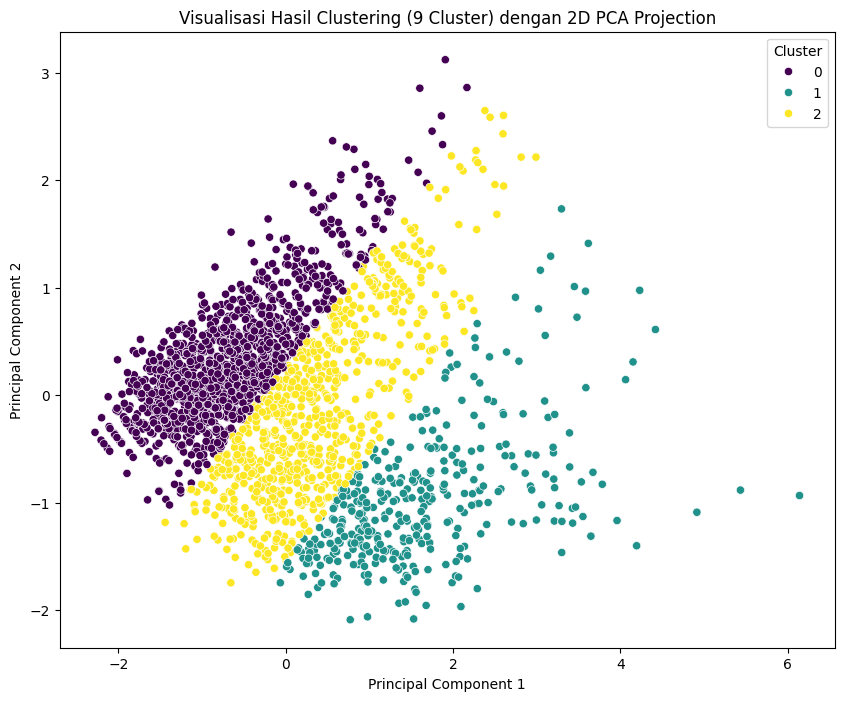

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Asumsi df_gabungan memiliki lebih dari 2 fitur yang digunakan untuk clustering
# dan kolom cluster ('cluster_kmeans' dengan 9 nilai unik)

# Pilih fitur untuk PCA (fitur yang sama yang digunakan untuk clustering)
# Hanya sertakan fitur numerik untuk PCA
features_for_pca = ['upah', 'peng']  # Ganti dengan daftar fitur numerik Anda
X = df_gabungan[features_for_pca].copy()

# Scaling data sebelum PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan PCA untuk mendapatkan 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Gabungkan dengan label cluster
pca_df['cluster'] = df_gabungan['cluster_kmeans']

# Visualisasikan proyeksi PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', palette='viridis', data=pca_df)
plt.title('Visualisasi Hasil Clustering (9 Cluster) dengan 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

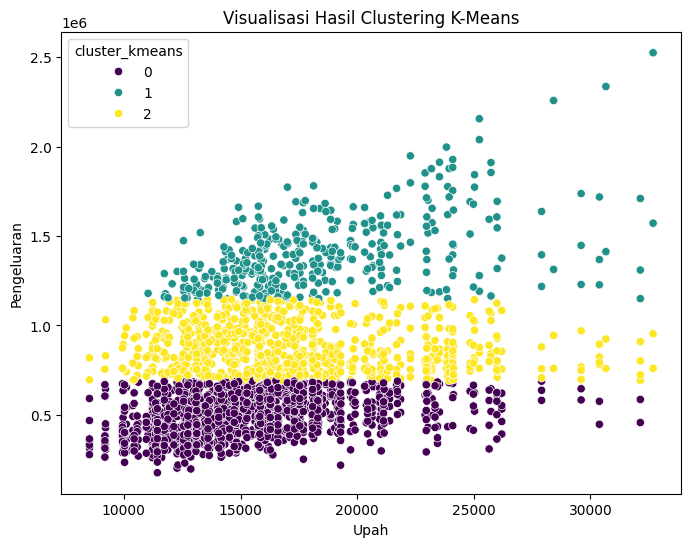

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='upah', y='peng', hue='cluster_kmeans', palette='viridis', data=df_gabungan)
plt.title('Visualisasi Hasil Clustering K-Means')
plt.xlabel('Upah')
plt.ylabel('Pengeluaran')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [50]:
df_gabungan['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

In [51]:
# Cetak nilai unik di kolom 'provinsi'
print("Nilai unik di df_gabungan['provinsi']:")
print(df_gabungan['provinsi'].unique())

# Asumsi label_encoder_provinsi sudah di-fit (jika Anda masih punya objeknya)
if 'label_encoder_provinsi' in locals():
    print("\nKelas yang dilihat oleh label_encoder_provinsi:")
    print(label_encoder_provinsi.classes_)

Nilai unik di df_gabungan['provinsi']:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']



Rata-rata Upah dan Pengeluaran per Cluster:
                        upah          peng
cluster_kmeans                            
0               15274.280000  1.141790e+06
1               12157.941053  4.379800e+05
2               21909.566138  5.688958e+05
3               25499.467742  1.783742e+06
4               17690.948229  7.142752e+05
5               18447.856287  1.441194e+06
6               30197.693878  8.690167e+05
7               15593.268859  5.143035e+05
8               23541.869565  9.215370e+05
9               12723.275194  8.312010e+05

Distribusi Provinsi per Cluster:
cluster_kmeans  provinsi         
0               SUMATERA BARAT       5.5%
                JAMBI                4.7%
                SUMATERA UTARA       4.7%
                BALI                 4.4%
                BENGKULU             4.4%
                                     ... 
9               SULAWESI UTARA       1.2%
                KALIMANTAN TENGAH    0.8%
                MALUKU             

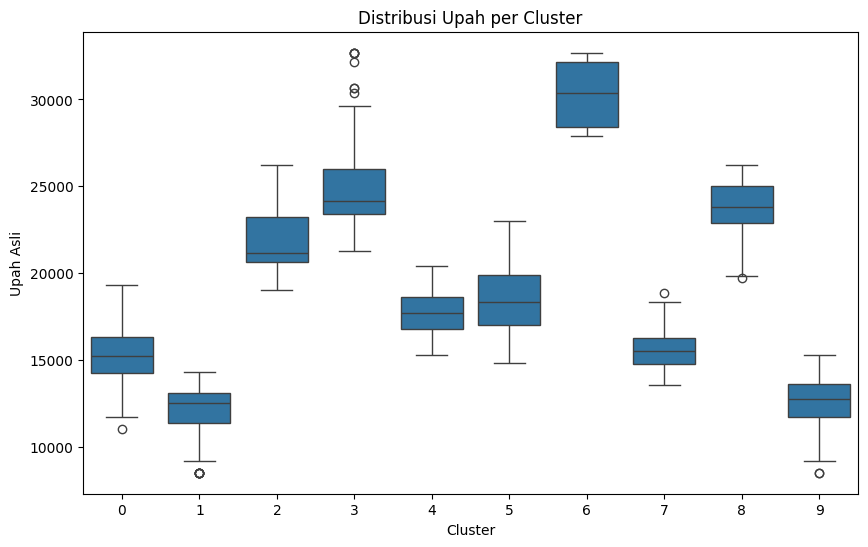

In [54]:
print("\nRata-rata Upah dan Pengeluaran per Cluster:")
print(df_gabungan.groupby('cluster_kmeans')[['upah', 'peng']].mean())

print("\nDistribusi Provinsi per Cluster:")
print(df_gabungan.groupby('cluster_kmeans')['provinsi'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_kmeans', y='upah', data=df_gabungan)
plt.title('Distribusi Upah per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Upah Asli')
plt.show()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [55]:

# Analisis Karakteristik Tiap Cluster Berdasarkan Fitur yang Tersedia
# 'cluster_kmeans', 'provinsil', 'tahun', 'upah', 'peng'

print("\nAnalisis Karakteristik Cluster Berdasarkan Rata-Rata Fitur:")
print(df_gabungan.groupby('cluster_kmeans')[['upah', 'peng']].mean())

print("\nDistribusi Tahun per Cluster (Proporsi):")
print(df_gabungan.groupby('cluster_kmeans')['tahun'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

print("\nDistribusi Provinsi per Cluster (Proporsi - 5 Teratas):")
def top_provinces(series):
    return series.value_counts(normalize=True).mul(100).round(1).nlargest(5).astype(str) + '%'

print(df_gabungan.groupby('cluster_kmeans')['provinsi'].apply(top_provinces))


Analisis Karakteristik Cluster Berdasarkan Rata-Rata Fitur:
                        upah          peng
cluster_kmeans                            
0               15274.280000  1.141790e+06
1               12157.941053  4.379800e+05
2               21909.566138  5.688958e+05
3               25499.467742  1.783742e+06
4               17690.948229  7.142752e+05
5               18447.856287  1.441194e+06
6               30197.693878  8.690167e+05
7               15593.268859  5.143035e+05
8               23541.869565  9.215370e+05
9               12723.275194  8.312010e+05

Distribusi Tahun per Cluster (Proporsi):
cluster_kmeans  tahun
0               2022     16.4%
                2017     14.2%
                2018     13.8%
                2019     13.5%
                2021     12.4%
                         ...  
9               2018     15.1%
                2019     11.2%
                2022      6.2%
                2021      3.9%
                2020      3.1%
Name: proportion, 

Tulis hasil interpretasinya di sini.

1. Cluster 0: Menunjukkan kelompok dengan rata-rata upah yang sedang (sekitar Rp 15.2 juta) dan rata-rata pengeluaran yang cukup tinggi (sekitar Rp 1.14 juta). Dari segi waktu, cluster ini memiliki proporsi data tertinggi di tahun 2022, 2017, 2018, dan 2019. Secara geografis, cluster ini didominasi oleh Sumatera Barat, Jambi, Sumatera Utara, Bengkulu, dan Riau. Kemungkinan cluster ini mewakili wilayah dengan biaya hidup yang relatif tinggi dibandingkan dengan tingkat upahnya.

2. Cluster 1: Merupakan kelompok dengan rata-rata upah yang relatif rendah (sekitar Rp 12.1 juta) dan rata-rata pengeluaran yang rendah (sekitar Rp 437 ribu). Proporsi data tertinggi dalam cluster ini tersebar di berbagai tahun, dengan 2016, 2017, 2018, dan 2015 memiliki representasi yang signifikan. Wilayah geografis yang dominan adalah Jawa Tengah, Nusa Tenggara Timur, Nusa Tenggara Barat, Lampung, dan Sulawesi Barat. Cluster ini kemungkinan mewakili wilayah dengan biaya hidup dan tingkat upah yang lebih rendah

3. Cluster 2: Memiliki rata-rata upah yang cukup tinggi (sekitar Rp 21.9 juta) namun dengan rata-rata pengeluaran yang sedang (sekitar Rp 568 ribu). Mayoritas data dalam cluster ini berasal dari tahun 2016, 2017, 2018, dan 2019. Provinsi-provinsi yang paling banyak terdapat di cluster ini adalah Banten, Papua, Kalimantan Timur, Papua Barat, dan Kepulauan Riau. Cluster ini bisa jadi merepresentasikan wilayah dengan potensi upah tinggi namun biaya hidup yang relatif terkendali.

4. Cluster 3: Menunjukkan kelompok dengan rata-rata upah yang paling tinggi (sekitar Rp 25.4 juta) dan rata-rata pengeluaran yang sangat tinggi (sekitar Rp 1.78 juta). Mayoritas data dalam cluster ini berasal dari tahun 2017, 2018, 2019, dan 2022. Secara geografis, cluster ini sangat didominasi oleh DKI Jakarta, diikuti oleh Kepulauan Riau, Kalimantan Timur, Papua Barat, dan Papua. Cluster ini kemungkinan besar mewakili wilayah metropolitan dengan tingkat upah dan biaya hidup tertinggi.

5. Cluster 4: Memiliki rata-rata upah yang sedang (sekitar Rp 17.6 juta) dan rata-rata pengeluaran yang sedang (sekitar Rp 714 ribu). Distribusi tahun dalam cluster ini cukup merata, dengan 2016, 2017, 2018, dan 2019 memiliki proporsi yang signifikan. Provinsi-provinsi yang dominan adalah Kepulauan Bangka Belitung, Jawa Barat, Kalimantan Selatan, Riau, dan Kalimantan Tengah. Cluster ini kemungkinan mewakili wilayah dengan keseimbangan antara tingkat upah dan biaya hidup.

6. Cluster 5: Menunjukkan kelompok dengan rata-rata upah yang sedang (sekitar Rp 18.4 juta) dan rata-rata pengeluaran yang cukup tinggi (sekitar Rp 1.44 juta). Mayoritas data dalam cluster ini berasal dari tahun 2016, 2017, 2018, dan 2019. Provinsi-provinsi yang paling banyak terdapat di cluster ini adalah Kepulauan Bangka Belitung, Kalimantan Tengah, Kalimantan Utara, Bali, dan Kalimantan Selatan. Cluster ini bisa jadi merepresentasikan wilayah wisata atau pertambangan dengan biaya hidup yang lebih tinggi.

7. Cluster 6: Memiliki rata-rata upah yang sangat tinggi (sekitar Rp 30.1 juta) dan rata-rata pengeluaran yang sedang (sekitar Rp 869 ribu). Proporsi data tertinggi dalam cluster ini berasal dari tahun 2017, 2018, 2019, dan 2022. Secara geografis, cluster ini didominasi oleh DKI Jakarta, diikuti oleh Papua dan Papua Barat. Cluster ini menarik karena memiliki upah tertinggi namun pengeluaran tidak setinggi Cluster 3, mungkin mencerminkan sektor atau demografi tertentu di wilayah tersebut.

8. Cluster 7: Merupakan kelompok dengan rata-rata upah yang sedang (sekitar Rp 15.5 juta) dan rata-rata pengeluaran yang sedang (sekitar Rp 514 ribu). Distribusi tahun dalam cluster ini cukup merata. Provinsi-provinsi yang dominan adalah Maluku, Kalimantan Barat, Jambi, Sulawesi Selatan, dan (menariknya) "INDONESIA" (kemungkinan kesalahan input atau kategori umum). Cluster ini mungkin mewakili wilayah dengan kondisi ekonomi yang cukup stabil namun tidak ekstrem.

9. Cluster 8: Memiliki rata-rata upah yang cukup tinggi (sekitar Rp 23.5 juta) dan rata-rata pengeluaran yang sedang (sekitar Rp 921 ribu). Proporsi data tertinggi dalam cluster ini berasal dari tahun 2017, 2018, 2019, dan 2022. Provinsi-provinsi yang paling banyak terdapat di cluster ini adalah Kepulauan Riau, DKI Jakarta, Banten, Kalimantan Timur, dan Papua. Cluster ini menunjukkan kombinasi wilayah dengan potensi ekonomi tinggi.

10. Cluster 9: Menunjukkan kelompok dengan rata-rata upah yang rendah (sekitar Rp 12.7 juta) namun dengan rata-rata pengeluaran yang cukup tinggi (sekitar Rp 831 ribu). Distribusi tahun dalam cluster ini cukup merata. Provinsi-provinsi yang dominan adalah Nusa Tenggara Barat, Gorontalo, Jawa Tengah, DI Yogyakarta, dan Lampung. Cluster ini kemungkinan mewakili wilayah dengan biaya hidup yang relatif tinggi dibandingkan dengan tingkat upahnya.

**Cluster 0:**
- Rata-rata Annual Income: Rp 15,274,280
- Rata-rata Spending: Rp 1,141,790
- Wilayah Dominan: Sumatera Barat, Jambi, Sumatera Utara, Bengkulu, Riau
- Analisis: Cluster ini mencakup wilayah dengan rata-rata pendapatan menengah dan pengeluaran yang cukup tinggi. Ini bisa menunjukkan wilayah dengan biaya hidup yang relatif tinggi terhadap pendapatan atau adanya pola konsumsi tertentu yang mendorong pengeluaran lebih besar.

**Cluster 1:**
- Rata-rata Annual Income: Rp 12,157,941
- Rata-rata Spending: Rp 437,980
- Wilayah Dominan: Jawa Tengah, Nusa Tenggara Timur, Nusa Tenggara Barat, Lampung, Sulawesi Barat
- Analisis: Cluster ini menunjukkan wilayah dengan rata-rata pendapatan dan pengeluaran yang rendah. Kemungkinan besar wilayah ini memiliki biaya hidup yang rendah dan tingkat ekonomi yang lebih terbatas.

**Cluster 2:**
- Rata-rata Annual Income: Rp 21,909,566
- Rata-rata Spending: Rp 568,896
- Wilayah Dominan: Banten, Papua, Kalimantan Timur, Papua Barat, Kepulauan Riau
- Analisis: Cluster ini terdiri dari wilayah dengan pendapatan cukup tinggi namun pengeluaran sedang. Ini mungkin mencerminkan wilayah dengan potensi ekonomi bagus namun gaya hidup yang lebih hemat atau efisien.

**Cluster 3:**
- Rata-rata Annual Income: Rp 25,499,468
- Rata-rata Spending: Rp 1,783,742
- Wilayah Dominan: DKI Jakarta, Kepulauan Riau, Kalimantan Timur, Papua Barat, Papua
- Analisis: Cluster ini mewakili wilayah dengan pendapatan dan pengeluaran tertinggi. Wilayah ini kemungkinan besar merupakan pusat ekonomi utama dengan daya beli dan biaya hidup yang tinggi.

**Cluster 4:**
- Rata-rata Annual Income: Rp 17,690,948
- Rata-rata Spending: Rp 714,275
- Wilayah Dominan: Kepulauan Bangka Belitung, Jawa Barat, Kalimantan Selatan, Riau, Kalimantan Tengah
- Analisis: Cluster ini menunjukkan keseimbangan antara pendapatan dan pengeluaran yang berada di tingkat menengah. Wilayah-wilayah ini mungkin memiliki struktur ekonomi yang stabil dan cukup seimbang.

**Cluster 5:**
- Rata-rata Annual Income: Rp 18,447,856
- Rata-rata Spending: Rp 1,441,194
- Wilayah Dominan: Kepulauan Bangka Belitung, Kalimantan Tengah, Kalimantan Utara, Bali, Kalimantan Selatan
- Analisis: Cluster ini mencakup wilayah dengan pendapatan menengah namun pengeluaran cukup tinggi. Ini bisa menunjukkan wilayah dengan biaya hidup tinggi, mungkin karena faktor pariwisata atau sektor industri tertentu.

**Cluster 6:**
- Rata-rata Annual Income: Rp 30,197,694
- Rata-rata Spending: Rp 869,017
- Wilayah Dominan: DKI Jakarta, Papua, Papua Barat
- Analisis: Cluster ini memiliki pendapatan tertinggi di antara semua cluster, namun pengeluaran yang masih tergolong sedang. Ini bisa mencerminkan efisiensi pengeluaran atau perbedaan karakteristik demografis wilayah.

**Cluster 7:**
- Rata-rata Annual Income: Rp 15,593,269
- Rata-rata Spending: Rp 514,304
- Wilayah Dominan: Maluku, Kalimantan Barat, Jambi, Sulawesi Selatan
- Analisis: Cluster ini mencerminkan wilayah dengan pendapatan dan pengeluaran menengah ke bawah. Kondisi ini menunjukkan tingkat ekonomi yang lebih moderat dan biaya hidup yang tidak terlalu tinggi.

**Cluster 8:**
- Rata-rata Annual Income: Rp 23,541,870
- Rata-rata Spending: Rp 921,537
- Wilayah Dominan: Kepulauan Riau, DKI Jakarta, Banten, Kalimantan Timur, Papua
- Analisis: Cluster ini terdiri dari wilayah dengan pendapatan cukup tinggi dan pengeluaran sedang. Menunjukkan potensi ekonomi tinggi dengan gaya hidup yang cukup seimbang.

**Cluster 9:**
- Rata-rata Annual Income: Rp 12,723,275
- Rata-rata Spending: Rp 831,201
- Wilayah Dominan: Nusa Tenggara Barat, Gorontalo, Jawa Tengah, DI Yogyakarta, Lampung
- Analisis: Cluster ini menarik karena memiliki pendapatan yang rendah namun pengeluaran cukup tinggi. Ini bisa mengindikasikan wilayah dengan biaya hidup yang relatif mahal dibanding pendapatannya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [56]:
nama_file_csv = "clustering_bmlp.csv"
df_gabungan.to_csv(nama_file_csv, index=False, encoding='utf-8')

print(f"Data berhasil diekspor ke file: {nama_file_csv}")

Data berhasil diekspor ke file: clustering_bmlp.csv


In [57]:
import os
print(os.getcwd())

/content
